In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define possible values for each field
day_type = ['Home', 'Office']
quarter = [1, 2, 3]
area = ['Core Service', 'Chat', 'Trader', 'Combined']
metric = ['AHT', 'Adherence', 'Survey', 'Productivity']

# Generate random data
np.random.seed(42)  # For reproducibility
data = {
    'Day_Type': np.random.choice(day_type, 50),
    'Quarter': np.random.choice(quarter, 50),
    'Area': np.random.choice(area, 50),
    'Metric': np.random.choice(metric, 50),
    'Value': np.round(np.random.uniform(50, 150, 50), 2)  # Random decimal values between 50 and 150
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

   Day_Type  Quarter          Area        Metric   Value
0      Home        3      Combined  Productivity   78.98
1    Office        2  Core Service           AHT   66.12
2      Home        3          Chat        Survey  142.97
3      Home        3        Trader  Productivity  130.81
4      Home        1  Core Service  Productivity  113.34
5    Office        3      Combined     Adherence  137.15
6      Home        1          Chat        Survey  130.37
7      Home        3  Core Service        Survey   68.66
8      Home        3      Combined           AHT  139.26
9    Office        1      Combined        Survey  103.93
10     Home        1      Combined           AHT  130.74
11     Home        3  Core Service        Survey  139.61
12     Home        2  Core Service     Adherence   81.80
13     Home        1  Core Service        Survey   61.01
14   Office        2        Trader           AHT   72.79
15     Home        2  Core Service           AHT   92.71
16   Office        2  Core Serv

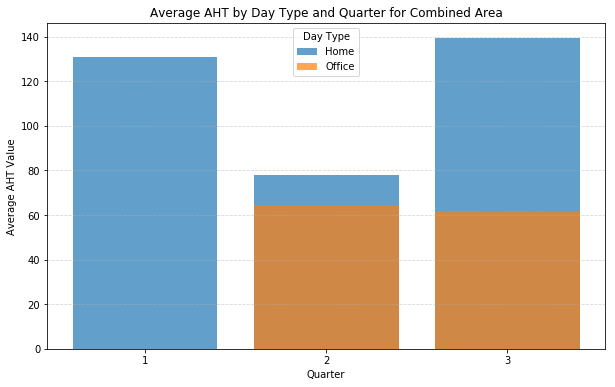

In [3]:
# Step 1: Filter the data for the specified 'Area' and 'Metric'
filtered_data = df[(df['Area'] == 'Combined') & (df['Metric'] == 'AHT')]

# Step 2: Group the data by 'Day_Type' and 'Quarter' and calculate the average 'Value'
grouped_data = filtered_data.groupby(['Day_Type', 'Quarter'])['Value'].mean().reset_index()

# Step 3: Plotting the bar chart
plt.figure(figsize=(10, 6))
for day_type in grouped_data['Day_Type'].unique():
    subset = grouped_data[grouped_data['Day_Type'] == day_type]
    plt.bar(subset['Quarter'], subset['Value'], label=day_type, alpha=0.7)

plt.title('Average AHT by Day Type and Quarter for Combined Area')
plt.xlabel('Quarter')
plt.ylabel('Average AHT Value')
plt.xticks(ticks=grouped_data['Quarter'].unique())
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

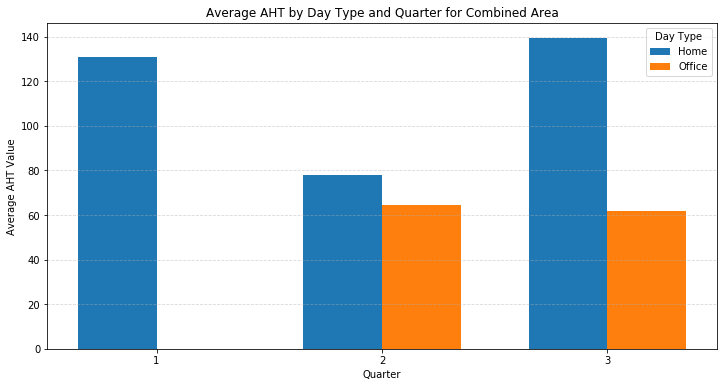

In [4]:
# Ensure data alignment by reindexing grouped data to include all combinations
grouped_data = grouped_data.set_index(['Day_Type', 'Quarter']).unstack(fill_value=0).stack().reset_index()

# Define bar width and positions
bar_width = 0.35
quarters = sorted(grouped_data['Quarter'].unique())
positions = np.arange(len(quarters))

plt.figure(figsize=(12, 6))

# Plotting separate bars for 'Home' and 'Office' within each quarter
for i, day_type in enumerate(grouped_data['Day_Type'].unique()):
    subset = grouped_data[grouped_data['Day_Type'] == day_type]
    plt.bar(positions + i * bar_width, subset['Value'], bar_width, label=day_type)

# Customize the chart
plt.title('Average AHT by Day Type and Quarter for Combined Area')
plt.xlabel('Quarter')
plt.ylabel('Average AHT Value')
plt.xticks(positions + bar_width / 2, quarters)  # Center grouped bars at each quarter
plt.legend(title='Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

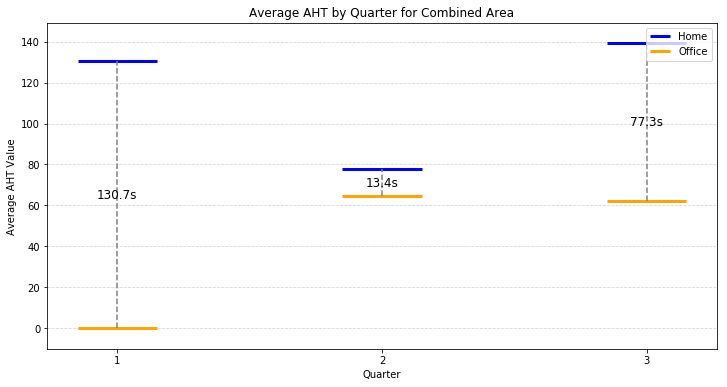

In [5]:
# Prepare the data
home_values = grouped_data[grouped_data['Day_Type'] == 'Home']
office_values = grouped_data[grouped_data['Day_Type'] == 'Office']

# Calculate the delta
delta = home_values['Value'].values - office_values['Value'].values

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the lines for Home (blue) and Office (orange)
plt.hlines(home_values['Value'], positions - 0.15, positions + 0.15, colors='blue', linewidth=3, label='Home')
plt.hlines(office_values['Value'], positions - 0.15, positions + 0.15, colors='orange', linewidth=3, label='Office')

# Add vertical lines to indicate the delta
for pos, home, office, d in zip(positions, home_values['Value'], office_values['Value'], delta):
    plt.vlines(pos, min(home, office), max(home, office), color='gray', linestyle='dashed')
    plt.text(pos, (home + office) / 2, f'{abs(d):.1f}s', ha='center', va='center', fontsize=12)

# Customize the chart
plt.title('Average AHT by Quarter for Combined Area')
plt.xlabel('Quarter')
plt.ylabel('Average AHT Value')
plt.xticks(positions, quarters)
plt.ylim(min(min(home_values['Value']), min(office_values['Value'])) - 10,
         max(max(home_values['Value']), max(office_values['Value'])) + 10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()